<a href="https://colab.research.google.com/github/whylucify1/ABC-Fuzzy-string/blob/main/ABC_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install packages
!pip install h2o
!pip install piml
!pip install numpy==1.23.5
!pip install xgboost==1.7.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.3-py2.py3-none-any.whl size=177694727 sha256=84b1379e2e849a958508536f7a7564ec628dec6db95447a5250dbba9ff914d94
  Stored in directory: /root/.cache/pip/wheels/9a/54/b6/c9ab3e71309ef0000bbe39e715020dc151bbfc557784b7f4c9
Successfully built h2o
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
########################################################################
#                                                                      #
# "Runtime" -> "Restart Runtime" DUE TO SOME BUG - then run this cell  #
#                                                                      #
########################################################################
from piml import Experiment
exp = Experiment()

In [ ]:
# upload local files
import io
from google.colab import files    
uploaded = files.upload()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Saving Final_names_updated.csv to Final_names_updated.csv


In [ ]:
# import pandas, load and view data
import pandas as pd
data = pd.read_csv(io.StringIO(uploaded['Final_names_updated.csv'].decode('utf-8')))
data = data[['UID', 'Theme', 'Category', 'Sub-category', 'Entity-Type',
                     'Original Name', 'Test Case Name']] # Select columns
data.head(5) 

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,UID,Theme,Category,Sub-category,Entity-Type,Original Name,Test Case Name
0,UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,LLC VALTEX-ST,LLC VALTEX-ST
1,UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,CLARA SHIPPING LLC,CLARA SHIPPING LLC
2,UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,CEC LIMITED,CEC LIMITED
3,UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,INVERSORA PANACOL S.A.,INVERSORA PANACOL S.A.
4,UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,BALOCHISTAN LIBERATION ARMY,BALOCHISTAN LIBERATION ARMY


In [ ]:
# start h2o
import h2o
h2o.init()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpq5i0sqpe
  JVM stdout: /tmp/tmpq5i0sqpe/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpq5i0sqpe/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.3
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_unknownUser_jf6ov1
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# load data into h2o and view
hdata = h2o.H2OFrame(data)
hdata

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


UID,Theme,Category,Sub-category,Entity-Type,Original Name,Test Case Name
UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,LLC VALTEX-ST,LLC VALTEX-ST
UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,CLARA SHIPPING LLC,CLARA SHIPPING LLC
UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,CEC LIMITED,CEC LIMITED
UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,INVERSORA PANACOL S.A.,INVERSORA PANACOL S.A.
UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,BALOCHISTAN LIBERATION ARMY,BALOCHISTAN LIBERATION ARMY
UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,SHAHID MOGHADDAM INDUSTRIES,SHAHID MOGHADDAM INDUSTRIES
UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,CONFIDERI PTE LTD,CONFIDERI PTE LTD
UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,PAO MOSOBLBANK,PAO MOSOBLBANK
UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,NATIONAL LIBERATION ARMY,NATIONAL LIBERATION ARMY
UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,INVERSIONES GILFE S.A.,INVERSIONES GILFE S.A.


In [ ]:
# generate string distances
for measure_ in ['lv', 'lcs', 'qgram', 'jaccard', 'jw', 'soundex']:
  hdata[measure_] = 1 - hdata['Original Name'].strdistance(hdata['Test Case Name'], measure=measure_)

hdata

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

UID,Theme,Category,Sub-category,Entity-Type,Original Name,Test Case Name,lv,lcs,qgram,jaccard,jw,soundex
UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,LLC VALTEX-ST,LLC VALTEX-ST,0,0,0,0,0,0
UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,CLARA SHIPPING LLC,CLARA SHIPPING LLC,0,0,0,0,0,0
UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,CEC LIMITED,CEC LIMITED,0,0,0,0,0,0
UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,INVERSORA PANACOL S.A.,INVERSORA PANACOL S.A.,0,0,0,0,0,0
UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,BALOCHISTAN LIBERATION ARMY,BALOCHISTAN LIBERATION ARMY,0,0,0,0,0,0
UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,SHAHID MOGHADDAM INDUSTRIES,SHAHID MOGHADDAM INDUSTRIES,0,0,0,0,0,0
UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,CONFIDERI PTE LTD,CONFIDERI PTE LTD,0,0,0,0,0,0
UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,PAO MOSOBLBANK,PAO MOSOBLBANK,0,0,0,0,0,0
UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,NATIONAL LIBERATION ARMY,NATIONAL LIBERATION ARMY,0,0,0,0,0,0
UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,INVERSIONES GILFE S.A.,INVERSIONES GILFE S.A.,0,0,0,0,0,0


In [ ]:
# convert data back to pandas for convience
data = hdata.as_data_frame()
data

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,UID,Theme,Category,Sub-category,Entity-Type,Original Name,Test Case Name,lv,lcs,qgram,jaccard,jw,soundex
0,UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,LLC VALTEX-ST,LLC VALTEX-ST,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1,UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,CLARA SHIPPING LLC,CLARA SHIPPING LLC,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2,UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,CEC LIMITED,CEC LIMITED,0.000000,0.000000,0.000000,0.0,0.000000,0.0
3,UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,INVERSORA PANACOL S.A.,INVERSORA PANACOL S.A.,0.000000,0.000000,0.000000,0.0,0.000000,0.0
4,UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,BALOCHISTAN LIBERATION ARMY,BALOCHISTAN LIBERATION ARMY,0.000000,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103386,NaN,No Name Match,No Name Match,No Name Match,Individual,AMITABH BACHCHAN,BRENDAN FRASER,0.937500,0.857143,0.923077,1.0,0.654762,1.0
103387,NaN,No Name Match,No Name Match,No Name Match,Individual,BRENDAN FRASER,RACHEL MCADAMS,0.857143,0.714286,0.846154,1.0,0.380952,1.0
103388,NaN,No Name Match,No Name Match,No Name Match,Individual,RACHEL MCADAMS,TOM HIDDLESTON,1.000000,1.000000,1.000000,1.0,0.476190,1.0
103389,NaN,No Name Match,No Name Match,No Name Match,Individual,TOM HIDDLESTON,AAMIR KHAN,0.785714,1.000000,1.000000,1.0,0.447619,1.0


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

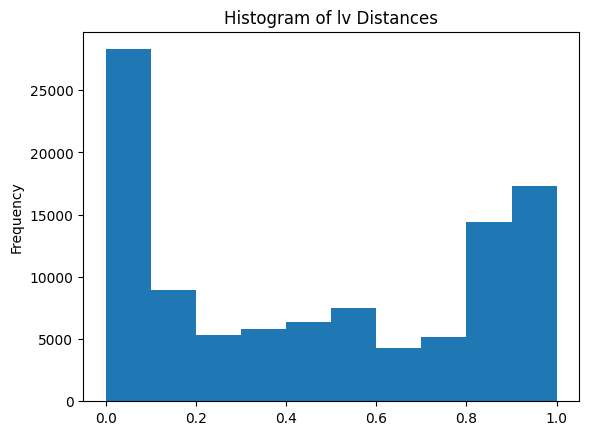

In [ ]:
# checkout your distances 
_ = data['lv'].plot(kind='hist', title='Histogram of lv Distances')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

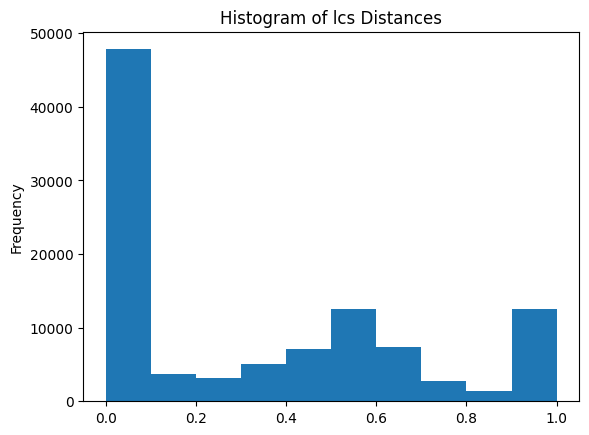

In [ ]:
# checkout your distances 
_ = data['lcs'].plot(kind='hist', title='Histogram of lcs Distances')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

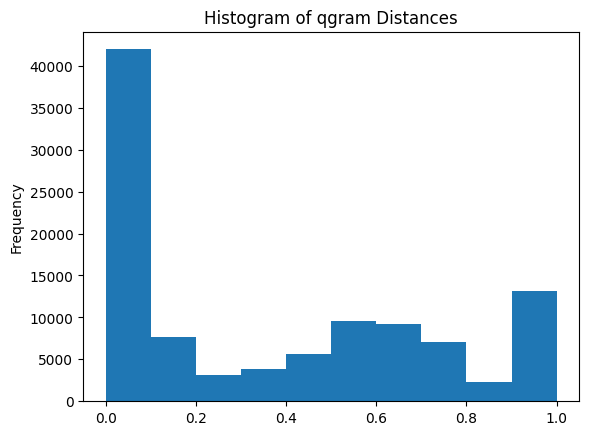

In [ ]:
# checkout your distances 
_ = data['qgram'].plot(kind='hist', title='Histogram of qgram Distances')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

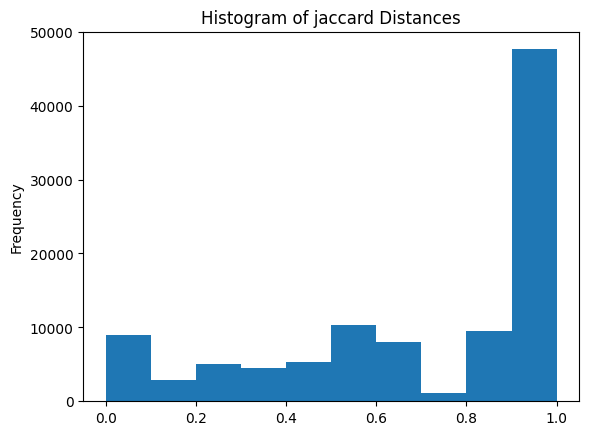

In [ ]:
# checkout your distances 
_ = data['jaccard'].plot(kind='hist', title='Histogram of jaccard Distances')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

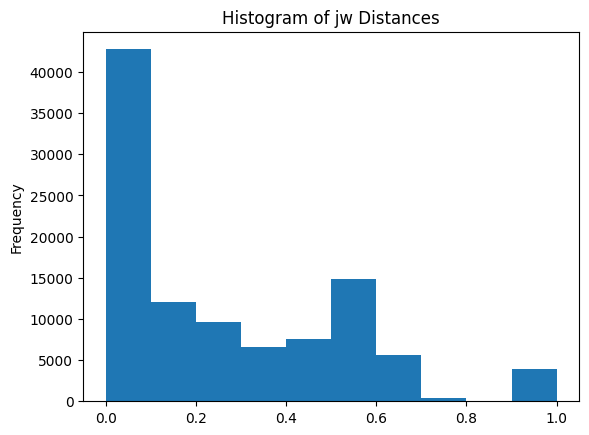

In [ ]:
# checkout your distances 
_ = data['jw'].plot(kind='hist', title='Histogram of jw Distances')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

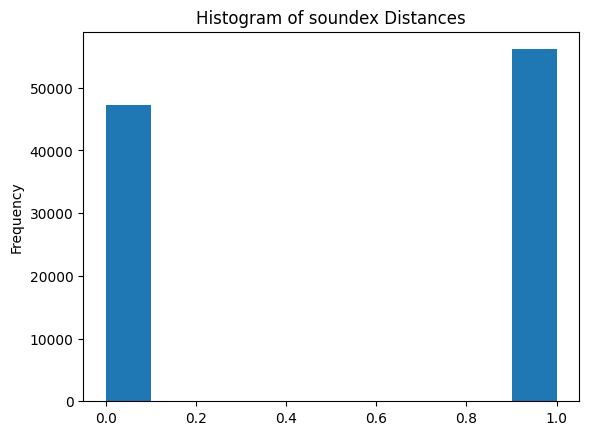

In [ ]:
# checkout your distances 
_ = data['soundex'].plot(kind='hist', title='Histogram of soundex Distances')

In [ ]:
# add target by some rule - NEEDS WORK!
# this where you implement the rules from the client
# 20% Levenshtein distance below 5, what is 5 in the 0-1 scale?
# 40% Levenshtein distance between 5 and 10, what is 5-10 on 0-1 scale?
# 20% Levenshtein distance above 10, what is 10 on 0-1 scale?
import numpy as np
data['target'] = 0
data['target'] = np.where(data['lv'] < 0.5 , 1, 0) # this is just a simple example
data[['lv', 'target']]

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,lv,target
0,0.000000,1
1,0.000000,1
2,0.000000,1
3,0.000000,1
4,0.000000,1
...,...,...
103386,0.937500,0
103387,0.857143,0
103388,1.000000,0
103389,0.785714,0


In [ ]:
 # load data into PiML
 exp.data_loader(data=data) 

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,UID,Theme,Category,Sub-category,Entity-Type,Original Name,Test Case Name,lv,lcs,qgram,jaccard,jw,soundex,target
0,UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,LLC VALTEX-ST,LLC VALTEX-ST,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,CLARA SHIPPING LLC,CLARA SHIPPING LLC,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,CEC LIMITED,CEC LIMITED,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,INVERSORA PANACOL S.A.,INVERSORA PANACOL S.A.,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,UID-55,Name deletions,Company Designator,1 Company designator removed,Entity,BALOCHISTAN LIBERATION ARMY,BALOCHISTAN LIBERATION ARMY,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103386,NaN,No Name Match,No Name Match,No Name Match,Individual,AMITABH BACHCHAN,BRENDAN FRASER,0.9375,0.857143,0.923077,1.0,0.654762,1.0,0.0
103387,NaN,No Name Match,No Name Match,No Name Match,Individual,BRENDAN FRASER,RACHEL MCADAMS,0.857143,0.714286,0.846154,1.0,0.380952,1.0,0.0
103388,NaN,No Name Match,No Name Match,No Name Match,Individual,RACHEL MCADAMS,TOM HIDDLESTON,1.0,1.0,1.0,1.0,0.47619,1.0,0.0
103389,NaN,No Name Match,No Name Match,No Name Match,Individual,TOM HIDDLESTON,AAMIR KHAN,0.785714,1.0,1.0,1.0,0.447619,1.0,0.0


In [ ]:
# Prepare dataset with default settings
exp.data_summary()
# soundex --> numerical
# exclude --> UID, Theme, Category, Sub-category, Entity-Type, Original Name, Test Case Name, lv (have to drop lv or models don't work)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.…

In [ ]:
# Prepare dataset with default settings
exp.data_prepare()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [ ]:
# train and register models
exp.model_train()
# GLM is good for benchmark 
# EBM is good for performance and explainability
# register models after training

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [ ]:
exp.model_interpret() # select model to intepret
# what features are important?
# do their shape functions/effect plots make sense?
# e.g., jw makes sense to me, but qgram does not

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>